In [1]:
import pandas as pd

data_df = pd.read_csv("/Users/katarinalaw/Desktop/heart.csv")

In [2]:
data_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Cleaning

In [3]:
#checking to see if there is any null value
data_df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [4]:
#checking to see if there is any duplicated rows
data_df.duplicated().any()

False

# Exploratory Data Analysis

In [5]:
#showing the summary statistics
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
#looking at the total count for with or without heart disease
data_df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

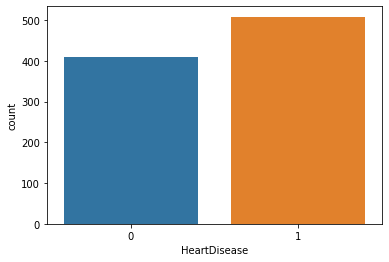

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting bar chart to show total count of people with or without heart disease
sns.countplot(x = "HeartDisease", data = data_df)

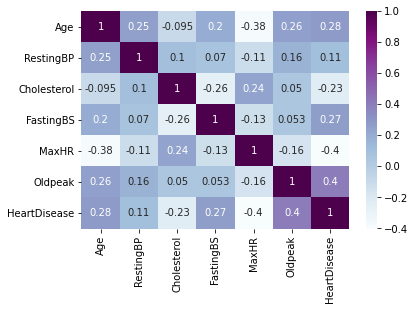

In [8]:
#looking at the correlation between each variable
sns.heatmap(data_df.corr(), annot = True, cmap = "BuPu");

Text(0, 0.5, 'Count')

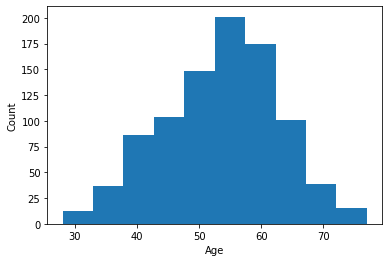

In [9]:
#looking at the distribution of heart disease by age using a Histogram
plt.hist(data_df.Age)
plt.xlabel("Age")
plt.ylabel("Count")

In [10]:
#diving into respective sex on heart disease
data_df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

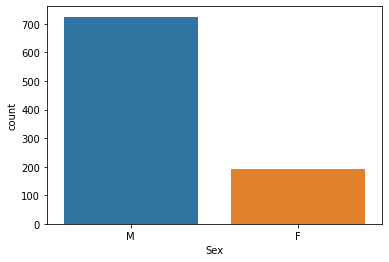

In [11]:
#plotting bar chart to show total count of male or female with heart disease
sns.countplot(x = "Sex", data = data_df)

/Users/katarinalaw/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

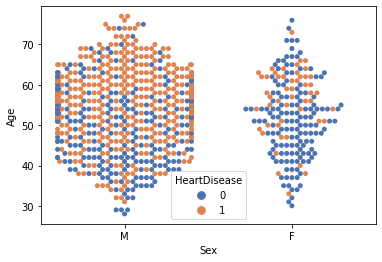

In [12]:
#showing the swarmplot to show the relationship of Age and Sex when it comes to Heart Disease
sns.swarmplot(x = "Sex", y = "Age", hue = "HeartDisease", data = data_df, palette = "deep")


In [13]:
#looking at the total count for each category of resting ECG
data_df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

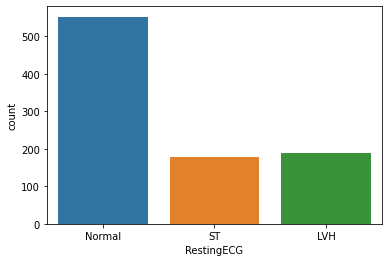

In [14]:
#plotting bar chart to show total count for respective resting ECG
sns.countplot(x = "RestingECG", data = data_df)

# Data Pre-Processing

In [15]:
#looking at numerical and categorical features
numerical= data_df.drop(["HeartDisease"], axis=1).select_dtypes("number").columns
categorical = data_df.select_dtypes("object").columns

print(f"Numerical Variables: {data_df[numerical].columns}")
print(f"Categorical Variables: {data_df[categorical].columns}")

Numerical Variables: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
Categorical Variables: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#encoding categorical variables
data_df["Sex"] = le.fit_transform(data_df["Sex"])
data_df["ChestPainType"] = le.fit_transform(data_df["ChestPainType"])
data_df["RestingECG"] = le.fit_transform(data_df["RestingECG"])
data_df["ExerciseAngina"] = le.fit_transform(data_df["ExerciseAngina"])
data_df["ST_Slope"] = le.fit_transform(data_df["ST_Slope"])

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
ss = StandardScaler() 

#scaling numeric features
data_df["Oldpeak"] = mms.fit_transform(data_df[["Oldpeak"]])
data_df["Age"] = ss.fit_transform(data_df[["Age"]])
data_df["RestingBP"] = ss.fit_transform(data_df[["RestingBP"]])
data_df["Cholesterol"] = ss.fit_transform(data_df[["Cholesterol"]])
data_df["MaxHR"] = ss.fit_transform(data_df[["MaxHR"]])

# Machine Learning Models

In [18]:
#feature selection for machine learning
X = data_df.drop(["HeartDisease"], axis = 1)
#X = data_df(["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])
y = data_df["HeartDisease"]

In [19]:
from sklearn.model_selection import train_test_split

#splitting data into 80% train and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Logistic Regression

In [21]:
lr_model = LogisticRegression()
y_pred_lr = lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [22]:
#confusion matrix
print(confusion_matrix(y_test, y_pred_lr))

[[71  9]
 [12 92]]


In [23]:
#classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        80
           1       0.91      0.88      0.90       104

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [24]:
#accuracy score
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", lr_accuracy)

Accuracy: 0.8858695652173914


Random Forest Classifier

In [25]:
rf_model = RandomForestClassifier(max_depth = 3, random_state = 0)
y_pred_rf = rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [26]:
#confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

[[66 14]
 [12 92]]


In [27]:
#classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        80
           1       0.87      0.88      0.88       104

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



In [28]:
#accuracy score
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_accuracy)

Accuracy: 0.8586956521739131


K-Nearest Neighbor

In [29]:
kn_model = KNeighborsClassifier(n_neighbors = 3)
y_pred_kn = kn_model.fit(X_train, y_train)
y_pred_kn = kn_model.predict(X_test)

In [30]:
#confusion matrix
print(confusion_matrix(y_test, y_pred_kn))

[[71  9]
 [ 9 95]]


In [31]:
#classification report
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        80
           1       0.91      0.91      0.91       104

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [32]:
#accuracy score
kn_accuracy = accuracy_score(y_test, y_pred_kn)
print("Accuracy:", kn_accuracy)

Accuracy: 0.9021739130434783


Gaussian Naive Bayes

In [33]:
gnb_model = GaussianNB()
y_pred_gnb = gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

In [34]:
#confusion matrix
print(confusion_matrix(y_test, y_pred_gnb))

[[71  9]
 [14 90]]


In [35]:
#classification report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        80
           1       0.91      0.87      0.89       104

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [36]:
#accuracy score
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy:", gnb_accuracy)

Accuracy: 0.875


Comparing the results of all 4 machine learning models

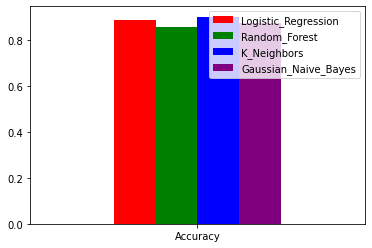

In [37]:
#plotting a bar chart to compare the accuracy of all three models
Logistic_Regression = [lr_accuracy]
Random_Forest = [rf_accuracy]
K_Neighbors = [kn_accuracy]
Gaussian_Naive_Bayes = [gnb_accuracy]
index = ["Accuracy"]
df = pd.DataFrame({'Logistic_Regression': Logistic_Regression,
                   'Random_Forest': Random_Forest,
                   'K_Neighbors' : K_Neighbors,
                   'Gaussian_Naive_Bayes': Gaussian_Naive_Bayes}, index = index)
ax = df.plot.bar(rot = 0,color = {"Logistic_Regression": "red", "Random_Forest": "green", "K_Neighbors": "blue", "Gaussian_Naive_Bayes": "purple"})


